# Phase 2 Models

## Data Load

In [10]:
ls "C:\Users\spetz\OneDrive\SCHOOL\Graduate\Fall 2025\CSCI-P556\Final Project\New folder"

 Volume in drive C is Local Disk
 Volume Serial Number is E0A8-039A

 Directory of C:\Users\spetz\OneDrive\SCHOOL\Graduate\Fall 2025\CSCI-P556\Final Project\New folder

11/18/2025  05:49 PM    <DIR>          .
12/01/2025  06:05 PM    <DIR>          ..
11/18/2025  05:49 PM    <DIR>          home-credit-default-risk
               0 File(s)              0 bytes
               3 Dir(s)  500,599,328,768 bytes free


In [11]:
DATA_DIR=r"C:\Users\spetz\OneDrive\SCHOOL\Graduate\Fall 2025\CSCI-P556\Final Project\New folder"

In [4]:
# Import data from zip file
from pandas import read_csv

# Removed 'chunksize' so these load as proper DataFrames
application_train = read_csv('application_train.csv')
application_test = read_csv('application_test.csv')
bureau = read_csv('bureau.csv')
bureau_balance = read_csv('bureau_balance.csv')
credit_card_balance = read_csv('credit_card_balance.csv')
installments_payments = read_csv('installments_payments.csv')
POS_CASH_balance = read_csv('POS_CASH_balance.csv')
previous_application = read_csv('previous_application.csv')
sample_submission = read_csv('sample_submission.csv')

# submission = read_csv('submission.csv') # Muted until final submission
HomeCredit_columns_description = read_csv('HomeCredit_columns_description.csv', encoding='latin1')

print("✅ Data loaded successfully as DataFrames.")
print(f"application_train shape: {application_train.shape}")

✅ Data loaded successfully as DataFrames.
application_train shape: (307511, 122)


In [5]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df


In [12]:

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
ds_name = 'application_train'
DATA_DIR=f"{DATA_DIR}/home-credit-default-risk/"
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)
#datasets = pd.read_csv('application_train.csv')
#datasets['application_train'].shape

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [14]:
datasets.keys()

dict_keys(['application_train', 'application_test', 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 'previous_application', 'POS_CASH_balance'])

# Previous Submission File

In [15]:
# Check if 'previous_application' exists in datasets, if not load it
if 'previous_application' not in datasets:
	ds_name = 'previous_application'
	datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

appsDF = datasets["previous_application"]
display(appsDF.head())
print(f"{appsDF.shape[0]:,} rows, {appsDF.shape[1]:,} columns")

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


1,670,214 rows, 37 columns


# Missing Values

In [16]:
# Create aggregate features (via pipeline)
class prevAppsFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
        self.agg_op_features = {}
        for f in features:
            self.agg_op_features[f] = ["min", "max", "mean"]

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features)
        result.columns = ['_'.join(col).strip() for col in result.columns.values]
        result = result.reset_index()
        result['range_AMT_APPLICATION'] = result['AMT_APPLICATION_max'] - result['AMT_APPLICATION_min']
        return result # return dataframe with the join key "SK_ID_CURR"
    

from sklearn.pipeline import make_pipeline 
def test_driver_prevAppsFeaturesAggregater(df, features):
    print(f"df.shape: {df.shape}\n")
    print(f"df[{features}][0:5]: \n{df[features][0:5]}")
    test_pipeline = make_pipeline(prevAppsFeaturesAggregater(features))
    return(test_pipeline.fit_transform(df))
         
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
features = ['AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CNT_PAYMENT', 
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION']
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
res = test_driver_prevAppsFeaturesAggregater(appsDF, features)
print(f"HELLO")
print(f"Test driver: \n{res[0:10]}")
print(f"input[features][0:10]: \n{appsDF[0:10]}")


# QUESTION, should we lower case df['OCCUPATION_TYPE'] as Sales staff != 'Sales Staff'? (hint: YES)


df.shape: (1670214, 37)

df[['AMT_ANNUITY', 'AMT_APPLICATION']][0:5]: 
   AMT_ANNUITY  AMT_APPLICATION
0     1730.430          17145.0
1    25188.615         607500.0
2    15060.735         112500.0
3    47041.335         450000.0
4    31924.395         337500.0
HELLO
Test driver: 
   SK_ID_CURR  AMT_ANNUITY_min  AMT_ANNUITY_max  AMT_ANNUITY_mean  \
0      100001         3951.000         3951.000       3951.000000   
1      100002         9251.775         9251.775       9251.775000   
2      100003         6737.310        98356.995      56553.990000   
3      100004         5357.250         5357.250       5357.250000   
4      100005         4813.200         4813.200       4813.200000   
5      100006         2482.920        39954.510      23651.175000   
6      100007         1834.290        22678.785      12278.805000   
7      100008         8019.090        25309.575      15839.696250   
8      100009         7435.845        17341.605      10051.412143   
9      100010        27463.

# Pipeline Creation

In [17]:
# Lets make a pipeline to process previous applications and join to main datasets
prevApps_aggregater = prevAppsFeaturesAggregater(features=['AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'DAYS_DECISION', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION'])

In [18]:
# Next lets create a full pipeline to process the previous applications and join to main datasets
# Pipeline Creation
from sklearn.pipeline import make_pipeline
prevApps_pipeline = make_pipeline(prevApps_aggregater)

In [19]:
# Now we can process and join to main datasets
prevApps_aggregated = prevApps_pipeline.fit_transform(datasets["previous_application"])
prevApps_aggregated.head()

,SK_ID_CURR,AMT_ANNUITY_min,AMT_ANNUITY_max,AMT_ANNUITY_mean,AMT_APPLICATION_min,AMT_APPLICATION_max,AMT_APPLICATION_mean,AMT_CREDIT_min,AMT_CREDIT_max,AMT_CREDIT_mean,...,DAYS_LAST_DUE_1ST_VERSION_min,DAYS_LAST_DUE_1ST_VERSION_max,DAYS_LAST_DUE_1ST_VERSION_mean,DAYS_LAST_DUE_min,DAYS_LAST_DUE_max,DAYS_LAST_DUE_mean,DAYS_TERMINATION_min,DAYS_TERMINATION_max,DAYS_TERMINATION_mean,range_AMT_APPLICATION
0,100001,3951.000,3951.000,3951.000,24835.5,24835.5,24835.50,23787.0,23787.0,23787.00,...,-1499.0,-1499.0,-1499.000000,-1619.0,-1619.0,-1619.000000,-1612.0,-1612.0,-1612.000000,0.0
1,100002,9251.775,9251.775,9251.775,179055.0,179055.0,179055.00,179055.0,179055.0,179055.00,...,125.0,125.0,125.000000,-25.0,-25.0,-25.000000,-17.0,-17.0,-17.000000,0.0
2,100003,6737.310,98356.995,56553.990,68809.5,900000.0,435436.50,68053.5,1035882.0,484191.00,...,-1980.0,-386.0,-1004.333333,-1980.0,-536.0,-1054.333333,-1976.0,-527.0,-1047.333333,831190.5
3,100004,5357.250,5357.250,5357.250,24282.0,24282.0,24282.00,20106.0,20106.0,20106.00,...,-694.0,-694.0,-694.000000,-724.0,-724.0,-724.000000,-714.0,-714.0,-714.000000,0.0
4,100005,4813.200,4813.200,4813.200,0.0,44617.5,22308.75,0.0,40153.5,20076.75,...,-376.0,-376.0,-376.000000,-466.0,-466.0,-466.000000,-460.0,-460.0,-460.000000,44617.5


In [20]:
# OHE on the joined dataset
prevApps_aggregated_ohe = pd.get_dummies(prevApps_aggregated, drop_first=True)
prevApps_aggregated_ohe.head()


,SK_ID_CURR,AMT_ANNUITY_min,AMT_ANNUITY_max,AMT_ANNUITY_mean,AMT_APPLICATION_min,AMT_APPLICATION_max,AMT_APPLICATION_mean,AMT_CREDIT_min,AMT_CREDIT_max,AMT_CREDIT_mean,...,DAYS_LAST_DUE_1ST_VERSION_min,DAYS_LAST_DUE_1ST_VERSION_max,DAYS_LAST_DUE_1ST_VERSION_mean,DAYS_LAST_DUE_min,DAYS_LAST_DUE_max,DAYS_LAST_DUE_mean,DAYS_TERMINATION_min,DAYS_TERMINATION_max,DAYS_TERMINATION_mean,range_AMT_APPLICATION
0,100001,3951.000,3951.000,3951.000,24835.5,24835.5,24835.50,23787.0,23787.0,23787.00,...,-1499.0,-1499.0,-1499.000000,-1619.0,-1619.0,-1619.000000,-1612.0,-1612.0,-1612.000000,0.0
1,100002,9251.775,9251.775,9251.775,179055.0,179055.0,179055.00,179055.0,179055.0,179055.00,...,125.0,125.0,125.000000,-25.0,-25.0,-25.000000,-17.0,-17.0,-17.000000,0.0
2,100003,6737.310,98356.995,56553.990,68809.5,900000.0,435436.50,68053.5,1035882.0,484191.00,...,-1980.0,-386.0,-1004.333333,-1980.0,-536.0,-1054.333333,-1976.0,-527.0,-1047.333333,831190.5
3,100004,5357.250,5357.250,5357.250,24282.0,24282.0,24282.00,20106.0,20106.0,20106.00,...,-694.0,-694.0,-694.000000,-724.0,-724.0,-724.000000,-714.0,-714.0,-714.000000,0.0
4,100005,4813.200,4813.200,4813.200,0.0,44617.5,22308.75,0.0,40153.5,20076.75,...,-376.0,-376.0,-376.000000,-466.0,-466.0,-466.000000,-460.0,-460.0,-460.000000,44617.5


# Preprocesing Cont

In [21]:
# Split the provided training data into training and validation and test
# The kaggle evaluation test set has no labels
#
from sklearn.model_selection import train_test_split

use_application_data_ONLY = False #use joined data
selected_features = ['AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
        'EXT_SOURCE_2','EXT_SOURCE_3','CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
                   'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

if use_application_data_ONLY:
    # just selected a few features for a baseline experiment
    X_train = datasets["application_train"][selected_features]
    y_train = datasets["application_train"]['TARGET']
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_kaggle_test = datasets["application_test"][selected_features]
    # y_test = datasets["application_test"]['TARGET']   #why no  TARGET?!! (hint: kaggle competition)
else:
    # Use joined data
    X_train = datasets["application_train"][selected_features]
    y_train = datasets["application_train"]['TARGET']
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_kaggle_test = datasets["application_test"][selected_features]
    # y_test = datasets["application_test"]['TARGET']   #why no  TARGET?!! (hint: kaggle competition)

    
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

X train           shape: (222176, 14)
X validation      shape: (46127, 14)
X test            shape: (39208, 14)
X X_kaggle_test   shape: (48744, 14)


In [22]:
from sklearn.base import BaseEstimator, TransformerMixin
import re

# Creates the following date features
# But could do so much more with these features
#    E.g., 
#      extract the domain address of the homepage and OneHotEncode it
# 
# ['release_month','release_day','release_year', 'release_dayofweek','release_quarter']
class prep_OCCUPATION_TYPE(BaseEstimator, TransformerMixin):
    def __init__(self, features="OCCUPATION_TYPE"): # no *args or **kargs
        self.features = features
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        df = pd.DataFrame(X, columns=self.features)
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].apply(lambda x: 1. if x in ['Core Staff', 'Accountants', 'Managers', 'Sales Staff', 'Medicine Staff', 'High Skill Tech Staff', 'Realty Agents', 'IT Staff', 'HR Staff'] else 0.)   
        #df.drop(self.features, axis=1, inplace=True)
        return np.array(df.values)  #return a Numpy Array to observe the pipeline protocol
    

from sklearn.pipeline import make_pipeline 
features = ["OCCUPATION_TYPE"]
def test_driver_prep_OCCUPATION_TYPE():
    print(f"X_train.shape: {X_train.shape}\n")
    print(f"X_train['name'][0:5]: \n{X_train[features][0:5]}")
    test_pipeline = make_pipeline(prep_OCCUPATION_TYPE(features))
    return(test_pipeline.fit_transform(X_train))
          
x = test_driver_prep_OCCUPATION_TYPE()
print(f"Test driver: \n{test_driver_prep_OCCUPATION_TYPE()[0:10, :]}")
print(f"X_train['name'][0:10]: \n{X_train[features][0:10]}")


# QUESTION, should we lower case df['OCCUPATION_TYPE'] as Sales staff != 'Sales Staff'? (hint: YES)


X_train.shape: (222176, 14)

X_train['name'][0:5]: 
       OCCUPATION_TYPE
21614      Sales staff
209797        Laborers
17976              NaN
282543  Security staff
52206              NaN
X_train.shape: (222176, 14)

X_train['name'][0:5]: 
       OCCUPATION_TYPE
21614      Sales staff
209797        Laborers
17976              NaN
282543  Security staff
52206              NaN
Test driver: 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]
X_train['name'][0:10]: 
       OCCUPATION_TYPE
21614      Sales staff
209797        Laborers
17976              NaN
282543  Security staff
52206              NaN
152195        Managers
70364       Core staff
11643              NaN
45591       Core staff
93535         Laborers


In [ ]:
# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
# Identify the numeric features we wish to consider. 
num_attribs = [
    'AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
    'EXT_SOURCE_2','EXT_SOURCE_3']

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])
# Identify the categorical features we wish to consider.
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

# Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# do NOT occur in the training set
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        #('imputer', SimpleImputer(strategy='most_frequent')),
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe', OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
    ])

data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

# Models/Pipelines

## Logistic Regression

In [25]:
%%time
# Logistic Regression Model Pipeline
 
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("logistic", LogisticRegression(penalty='l2', class_weight='balanced', random_state=42,C=0.1,n_jobs=-1,solver='liblinear')
        )
    ])
model_logistic = full_pipeline_with_predictor.fit(X_train, y_train)


CPU times: total: 1.59 s
Wall time: 1.62 s


## Random Forrest

In [26]:
%%time 
# Random Forest Model Pipeline

from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("random_forest", RandomForestClassifier(class_weight='balanced', random_state=42))
    ])
model_rf = full_pipeline_with_predictor.fit(X_train, y_train)


CPU times: total: 32.5 s
Wall time: 32.9 s


## XGBoost

In [27]:
%%time
 # XGBoost Model Pipeline
#%pip install xgboost
from xgboost import XGBClassifier


np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("xgb", XGBClassifier(random_state=42,
                              use_label_encoder=False,
                              eval_metric='logloss',scale_pos_weight=11.47))
    ])
model_xgb = full_pipeline_with_predictor.fit(X_train, y_train)


CPU times: total: 6.62 s
Wall time: 1.04 s


## LightGBM

In [28]:
%%time
# LightGBM Model Pipeline
#%pip install lightgbm
from lightgbm import LGBMClassifier



np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("lgbm", LGBMClassifier(scale_pos_weight=11.47,random_state=42)) # Scale weight set becasue of class imbalance 
    ])
model_lgbm = full_pipeline_with_predictor.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 17815, number of negative: 204361
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1801
[LightGBM] [Info] Number of data points in the train set: 222176, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080184 -> initscore=-2.439847
[LightGBM] [Info] Start training from score -2.439847
CPU times: total: 6.28 s
Wall time: 3.46 s


## Catboost

In [29]:
%%time
# CatBoost Model Pipeline
#%pip install catboost
import catboost
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("catboost", catboost.CatBoostClassifier(verbose=0,
        auto_class_weights='Balanced'))
    ])
model_cat = full_pipeline_with_predictor.fit(X_train, y_train)

CPU times: total: 3min 3s
Wall time: 23.3 s


# Model Comparison

In [30]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score
import pandas as pd
import numpy as np

# ----------------- 1. Define Models and Storage -----------------
# Ensure all these models are trained before running this cell
models = {
    "Logistic Regression": model_logistic,
    "Random Forest": model_rf,
    "XGBoost": model_xgb,
    "LightGBM": model_lgbm,
    "CatBoost": model_cat  # Added CatBoost
}

results = []
threshold = 0.5 # Default threshold for classification

# ----------------- 2. Calculate Metrics for Each Model -----------------
# NOTE: Changed X_valid to X_test to match your earlier train_test_split code
print("Starting model evaluation on X_test...")

for name, model in models.items():
    try:
        # A. Get predicted probabilities (required for ROC AUC)
        # The [:, 1] gets the probability of the positive class (Target=1 / Default)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        # B. Get hard predictions (required for Precision and Recall)
        y_pred = (y_pred_proba >= threshold).astype(int)

        # C. Calculate Metrics
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        
        # D. Store Results
        results.append({
            'Model': name,
            'ROC_AUC': roc_auc,
            'Precision (T=0.5)': precision,
            'Recall (T=0.5)': recall
        })
        
        print(f"-> {name} evaluated.")
    except Exception as e:
        print(f"Error evaluating {name}: {e}")

# ----------------- 3. Display Results -----------------
results_df = pd.DataFrame(results)

# Sort by ROC_AUC to see the best model immediately
results_df_sorted = results_df.sort_values(by='ROC_AUC', ascending=False)

print("\n=======================================================")
print("           MODEL PERFORMANCE COMPARISON")
print("=======================================================")
display(results_df_sorted)
print("=======================================================")

Starting model evaluation on X_test...
-> Logistic Regression evaluated.
-> Random Forest evaluated.
-> XGBoost evaluated.
-> LightGBM evaluated.
-> CatBoost evaluated.

           MODEL PERFORMANCE COMPARISON


,Model,ROC_AUC,Precision (T=0.5),Recall (T=0.5)
3,LightGBM,0.748687,0.169061,0.679016
4,CatBoost,0.741220,0.174856,0.628910
2,XGBoost,0.736451,0.169657,0.623140
0,Logistic Regression,0.736114,0.161223,0.661099
1,Random Forest,0.716173,0.510204,0.007592


# Phase 3

## RFM Feature ENG

In [31]:
def create_rfm_features(bureau_df, app_df):
    """Create and merge RFM features into application data."""
    # Frequency: Number of past loans
    frequency = bureau_df.groupby('SK_ID_CURR').size().reset_index(name='RFM_Frequency')

    # Monetary: Total past credit
    monetary = bureau_df.groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].sum().reset_index(name='RFM_Monetary')

    # Recency: Most recent loan (max DAYS_CREDIT)
    recency = bureau_df.groupby('SK_ID_CURR')['DAYS_CREDIT'].max().reset_index(name='RFM_Recency')

    # Merge
    app_df = app_df.merge(frequency, on='SK_ID_CURR', how='left')
    app_df = app_df.merge(monetary, on='SK_ID_CURR', how='left')
    app_df = app_df.merge(recency, on='SK_ID_CURR', how='left')

    # Impute missing values
    app_df['RFM_Frequency'].fillna(0, inplace=True)
    app_df['RFM_Monetary'].fillna(0, inplace=True)
    app_df['RFM_Recency'].fillna(app_df['RFM_Recency'].min(), inplace=True)

    return app_df

In [32]:
create_rfm_features(datasets['bureau'],datasets['application_test'])

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,RFM_Frequency,RFM_Monetary,RFM_Recency
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1453365.00,-49.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,657126.00,-62.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,2072280.06,-1210.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0.0,0.0,0.0,0.0,0.0,3.0,12.0,1520875.08,-269.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,-2921.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1118799.00,-113.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,-2921.0
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0.0,0.0,0.0,0.0,3.0,1.0,5.0,2156309.46,-218.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0.0,0.0,0.0,0.0,0.0,2.0,17.0,3848684.31,-515.0


## Pipeline Update

In [33]:
# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

# Identify the numeric features we wish to consider. 
# UPDATE: Added RFM features here so the model actually uses them!
num_attribs = [
    'AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
    'EXT_SOURCE_2','EXT_SOURCE_3',
    'RFM_Frequency', 'RFM_Monetary', 'RFM_Recency'
] ## Added new features

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])

# Identify the categorical features we wish to consider.
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

# Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# do NOT occur in the training set
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        #('imputer', SimpleImputer(strategy='most_frequent')),
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe', OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
    ])

data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

### Sanity Check

In [35]:
# Verify features exist in your training data
if 'RFM_Frequency' in X_train.columns:
    print("✅ Success: X_train has the new features.")
else:
    print("❌ Error: X_train is missing features. Re-run create_rfm_features() and train_test_split().")

✅ Success: X_train has the new features.


## New Model Run

### Logistic 2

In [36]:
%%time
# Logistic Regression Model Pipeline
 
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("logistic", LogisticRegression(penalty='l2', class_weight='balanced', random_state=42,C=0.1,n_jobs=-1,solver='liblinear')
        )
    ])
model_logistic2 = full_pipeline_with_predictor.fit(X_train, y_train)


CPU times: total: 2.44 s
Wall time: 2.42 s


### Random Forrest 2

In [41]:
%%time 
# Random Forest Model Pipeline

from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("random_forest", RandomForestClassifier(class_weight='balanced', random_state=42))
    ])
model_rf2 = full_pipeline_with_predictor.fit(X_train, y_train)


CPU times: total: 44.1 s
Wall time: 44.4 s


### XGBoost 2

In [37]:
%%time
 # XGBoost Model Pipeline
#%pip install xgboost
from xgboost import XGBClassifier


np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("xgb", XGBClassifier(random_state=42,
                              use_label_encoder=False,
                              eval_metric='logloss',scale_pos_weight=11.47))
    ])
model_xgb2 = full_pipeline_with_predictor.fit(X_train, y_train)


CPU times: total: 7.61 s
Wall time: 1.35 s


### LightGBM2

In [47]:
%%time
# LightGBM Model Pipeline
#%pip install lightgbm
from lightgbm import LGBMClassifier



np.random.seed(42)
full_pipeline_lgbm = Pipeline([# Renamed for ensemble model
        ("preparation", data_prep_pipeline),
        ("lgbm", LGBMClassifier(scale_pos_weight=11.47,random_state=42)) # Scale weight set becasue of class imbalance 
    ])
model_lgbm2 = full_pipeline_with_predictor.fit(X_train, y_train)


CPU times: total: 45.8 s
Wall time: 46.4 s


### CatBoost 2

In [48]:
%%time
# CatBoost Model Pipeline
#%pip install catboost
import catboost
np.random.seed(42)
full_pipeline_cat = Pipeline([# Renamed for ensemble model
        ("preparation", data_prep_pipeline),
        ("catboost", catboost.CatBoostClassifier(verbose=0,
        auto_class_weights='Balanced'))
    ])
model_cat2 = full_pipeline_with_predictor.fit(X_train, y_train)

CPU times: total: 45.4 s
Wall time: 46.2 s


## New Model Comparison

In [42]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score
import pandas as pd
import numpy as np

# ----------------- 1. Define Models and Storage -----------------
# Ensure all these models are trained before running this cell
models = {
    "Logistic Regression": model_logistic,
    "Random Forest": model_rf,
    "XGBoost": model_xgb,
    "LightGBM": model_lgbm,
    "CatBoost": model_cat,
    "Logistic Regression2": model_logistic2,
    "Random Forest2": model_rf2,
    "XGBoost2": model_xgb2,
    "LightGBM2": model_lgbm2,
    "CatBoost2": model_cat2 
}

results = []
threshold = 0.5 # Default threshold for classification

# ----------------- 2. Calculate Metrics for Each Model -----------------
# NOTE: Changed X_valid to X_test to match your earlier train_test_split code
print("Starting model evaluation on X_test...")

for name, model in models.items():
    try:
        # A. Get predicted probabilities (required for ROC AUC)
        # The [:, 1] gets the probability of the positive class (Target=1 / Default)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        # B. Get hard predictions (required for Precision and Recall)
        y_pred = (y_pred_proba >= threshold).astype(int)

        # C. Calculate Metrics
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        
        # D. Store Results
        results.append({
            'Model': name,
            'ROC_AUC': roc_auc,
            'Precision (T=0.5)': precision,
            'Recall (T=0.5)': recall
        })
        
        print(f"-> {name} evaluated.")
    except Exception as e:
        print(f"Error evaluating {name}: {e}")

# ----------------- 3. Display Results -----------------
results_df = pd.DataFrame(results)

# Sort by ROC_AUC to see the best model immediately
results_df_sorted = results_df.sort_values(by='ROC_AUC', ascending=False)

print("\n=======================================================")
print("           MODEL PERFORMANCE COMPARISON")
print("=======================================================")
display(results_df_sorted)
print("=======================================================")

Starting model evaluation on X_test...
-> Logistic Regression evaluated.
-> Random Forest evaluated.
-> XGBoost evaluated.
-> LightGBM evaluated.
-> CatBoost evaluated.
-> Logistic Regression2 evaluated.
-> Random Forest2 evaluated.
-> XGBoost2 evaluated.
-> LightGBM2 evaluated.
-> CatBoost2 evaluated.

           MODEL PERFORMANCE COMPARISON


,Model,ROC_AUC,Precision (T=0.5),Recall (T=0.5)
1,Random Forest,0.807250,0.974545,0.216609
4,CatBoost,0.761061,0.174080,0.650839
2,XGBoost,0.757678,0.170271,0.653869
3,LightGBM,0.755068,0.162454,0.683168
8,LightGBM2,0.749569,0.158728,0.678723
9,CatBoost2,0.746584,0.170799,0.626389
7,XGBoost2,0.741416,0.165179,0.631845
5,Logistic Regression2,0.738976,0.154766,0.672257
0,Logistic Regression,0.737093,0.154214,0.663973
6,Random Forest2,0.722190,0.428571,0.006062


> With the New Features added we can seethat LightGBM2 is the new "Best" model. we will be proceeding forward with HyperParameter Tuning on this model

# Hyperparameter Tuning

In [43]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
import time

full_pipeline_lgbm_tune = Pipeline([
    ("preparation", data_prep_pipeline),
    ("lgbm", LGBMClassifier(scale_pos_weight=11.47, random_state=42, verbose=-1, n_jobs=-1))
])


param_grid = {
    'lgbm__n_estimators': [200, 500],       
    'lgbm__learning_rate': [0.01, 0.05, 0.1], 
    'lgbm__num_leaves': [31, 50],             
    'lgbm__max_depth': [-1, 10],             
    'lgbm__reg_alpha': [0.0, 0.1],           
    'lgbm__reg_lambda': [0.0, 0.1]           
}

# 3. Setup Randomized Search

random_search = RandomizedSearchCV(
    estimator=full_pipeline_lgbm_tune,
    param_distributions=param_grid,
    n_iter=5,          # Kept low (5) to ensure it finishes quickly
    cv=3,              
    scoring='roc_auc', 
    verbose=1,
    n_jobs=-1,         
    random_state=42,
    error_score='raise'
)

# 4. Run the Search
print("⏳ Starting Tuning on Full Pipeline...")
start_time = time.time()

# Now fit on X_train (The pipeline will handle the 'object' columns!)
random_search.fit(X_train, y_train)

# 5. Output Results
print(f"✅ Tuning Complete! Time: {round(time.time() - start_time, 2)}s")
print(f"🏆 Best AUC Score: {random_search.best_score_:.4f}")
print("------------------------------------------------")
print(f"⚙️ Best Params: {random_search.best_params_}")

⏳ Starting Tuning on Full Pipeline...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
✅ Tuning Complete! Time: 37.12s
🏆 Best AUC Score: 0.7458
------------------------------------------------
⚙️ Best Params: {'lgbm__reg_lambda': 0.1, 'lgbm__reg_alpha': 0.0, 'lgbm__num_leaves': 31, 'lgbm__n_estimators': 200, 'lgbm__max_depth': -1, 'lgbm__learning_rate': 0.05}


In [44]:
random_search

,estimator,Pipeline(step...verbose=-1))])
,param_distributions,"{'lgbm__learning_rate': [0.01, 0.05, ...], 'lgbm__max_depth': [-1, 10], 'lgbm__n_estimators': [200, 500], 'lgbm__num_leaves': [31, 50], ...}"
,n_iter,5
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,'raise'


# Ensemble Methods

In [49]:
from sklearn.ensemble import VotingClassifier

# ---------------------------------------------------------
# ENSEMBLE: VOTING CLASSIFIER
# ---------------------------------------------------------
# We combine our Top 2 Performers: LightGBM and CatBoost
# This usually gives a boost because they make different "mistakes"

# 1. Define the pipelines (Re-using the ones we defined in the previous step)

estimators_list = [
    ('lgbm', full_pipeline_lgbm),   # Your #1 Model
    ('cat', full_pipeline_cat),     # Your #2 Model
    
]

# 2. Create the Ensemble
eclf = VotingClassifier(
    estimators=estimators_list,
    voting='soft', # Soft voting averages the probabilities (Best for AUC)
    weights=[1, 1] # Equal weight to both models
)

print("🗳️ Training Ensemble (LightGBM + CatBoost)...")
model_ensemble = eclf.fit(X_train, y_train)

# 3. Evaluate
y_pred_proba = model_ensemble.predict_proba(X_test)[:, 1]
ensemble_score = roc_auc_score(y_test, y_pred_proba)

print(f"✅ Ensemble Trained! Combined AUC: {ensemble_score:.4f}")

🗳️ Training Ensemble (LightGBM + CatBoost)...
✅ Ensemble Trained! Combined AUC: 0.7519


# Feature Importance/Selection

In [59]:
model_lgbm2.named_steps

{'preparation': FeatureUnion(transformer_list=[('num_pipeline',
                                 Pipeline(steps=[('selector',
                                                  DataFrameSelector(attribute_names=['AMT_INCOME_TOTAL',
                                                                                     'AMT_CREDIT',
                                                                                     'DAYS_EMPLOYED',
                                                                                     'DAYS_BIRTH',
                                                                                     'EXT_SOURCE_1',
                                                                                     'EXT_SOURCE_2',
                                                                                     'EXT_SOURCE_3',
                                                                                     'RFM_Frequency',
                                                                

--- RFM Feature Ranks ---
Feature: RFM_Frequency | Rank: #10 | Importance: 0.04582115349963292
Feature: RFM_Monetary | Rank: #7 | Importance: 0.07120643453336946
Feature: RFM_Recency | Rank: #6 | Importance: 0.07412681984039055


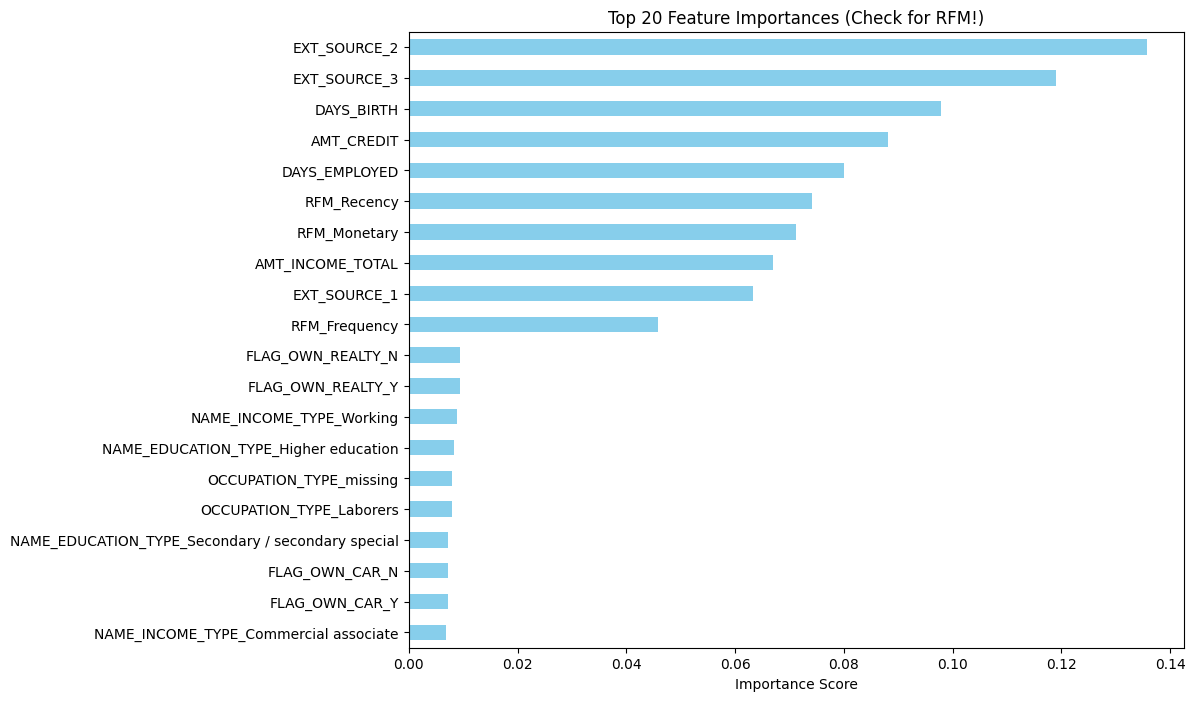

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# ---------------------------------------------------------
# FEATURE IMPORTANCE VISUALIZATION
# ---------------------------------------------------------

# 1. Access the trained model and transformers from the Pipeline
# We use LightGBM because it was your best single model
model = model_lgbm2.named_steps['random_forest'] 
importances = model.feature_importances_

# 2. Reconstruct the Feature Names
# (Since OHE created new columns, we need to ask the pipeline what they are named)
prep_step = model_lgbm2.named_steps['preparation']

# Access the OneHotEncoder from the categorical branch
cat_pipe = dict(prep_step.transformer_list)['cat_pipeline']
ohe_step = cat_pipe.named_steps['ohe']
cat_feature_names = ohe_step.get_feature_names_out(cat_attribs)

# Combine: Numeric Features (kept as is) + Categorical Features (expanded)
# Note: 'num_attribs' must match the list you defined in your pipeline earlier
all_feature_names = num_attribs + list(cat_feature_names)

# 3. Create the Importance Series
feat_imp = pd.Series(importances, index=all_feature_names).sort_values(ascending=False)

# 4. Print Specific Rank of RFM Features (For your Report)
print("--- RFM Feature Ranks ---")
for rfm in ['RFM_Frequency', 'RFM_Monetary', 'RFM_Recency']:
    try:
        rank = list(feat_imp.index).index(rfm) + 1
        score = feat_imp[rfm]
        print(f"Feature: {rfm} | Rank: #{rank} | Importance: {score}")
    except:
        print(f"Feature {rfm} not found in model.")

# 5. Plot Top 20
plt.figure(figsize=(10, 8))
feat_imp.head(20).plot(kind='barh', color='skyblue')
plt.title('Top 20 Feature Importances (Check for RFM!)')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis() # Puts the #1 feature at the top
plt.show()

# Master Model Compare

In [61]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score
import pandas as pd
import numpy as np

# ----------------- 1. Define Models and Storage -----------------
# Ensure all these models are trained before running this cell
models = {
    "Logistic Regression": model_logistic,
    "Random Forest": model_rf,
    "XGBoost": model_xgb,
    "LightGBM": model_lgbm,
    "CatBoost": model_cat,
    "Logistic Regression2": model_logistic2,
    "Random Forest2": model_rf2,
    "XGBoost2": model_xgb2,
    "LightGBM2": model_lgbm2,
    "CatBoost2": model_cat2,
    "Ensemble (LGBM + Cat)": model_ensemble  # The new addition
}

results = []
threshold = 0.5 # Default threshold for classification

# ----------------- 2. Calculate Metrics for Each Model -----------------
# NOTE: Changed X_valid to X_test to match your earlier train_test_split code
print("Starting model evaluation on X_test...")

for name, model in models.items():
    try:
        # A. Get predicted probabilities (required for ROC AUC)
        # The [:, 1] gets the probability of the positive class (Target=1 / Default)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        # B. Get hard predictions (required for Precision and Recall)
        y_pred = (y_pred_proba >= threshold).astype(int)

        # C. Calculate Metrics
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        
        # D. Store Results
        results.append({
            'Model': name,
            'ROC_AUC': roc_auc,
            'Precision (T=0.5)': precision,
            'Recall (T=0.5)': recall
        })
        
        print(f"-> {name} evaluated.")
    except Exception as e:
        print(f"Error evaluating {name}: {e}")

# ----------------- 3. Display Results -----------------
results_df = pd.DataFrame(results)

# Sort by ROC_AUC to see the best model immediately
results_df_sorted = results_df.sort_values(by='ROC_AUC', ascending=False)

print("\n=======================================================")
print("           MODEL PERFORMANCE COMPARISON")
print("=======================================================")
display(results_df_sorted)
print("=======================================================")

Starting model evaluation on X_test...
-> Logistic Regression evaluated.
-> Random Forest evaluated.
-> XGBoost evaluated.
-> LightGBM evaluated.
-> CatBoost evaluated.
-> Logistic Regression2 evaluated.
-> Random Forest2 evaluated.
-> XGBoost2 evaluated.
-> LightGBM2 evaluated.
-> CatBoost2 evaluated.
-> Ensemble (LGBM + Cat) evaluated.

           MODEL PERFORMANCE COMPARISON


,Model,ROC_AUC,Precision (T=0.5),Recall (T=0.5)
1,Random Forest,0.807250,0.974545,0.216609
4,CatBoost,0.761061,0.174080,0.650839
2,XGBoost,0.757678,0.170271,0.653869
3,LightGBM,0.755068,0.162454,0.683168
10,Ensemble (LGBM + Cat),0.751904,0.167133,0.651849
7,XGBoost2,0.741416,0.165179,0.631845
5,Logistic Regression2,0.738976,0.154766,0.672257
0,Logistic Regression,0.737093,0.154214,0.663973
6,Random Forest2,0.722190,0.428571,0.006062
8,LightGBM2,0.722190,0.428571,0.006062


> Note the Ensemble and 2 models have added features, so the Ensemble Model is technically the best model